# Load dataset

In [ ]:
!wget https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz

--2021-02-27 19:30:08--  https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25342182 (24M) [application/x-gzip]
Saving to: ‘kinetics700_2020.tar.gz’

kinetics700_2020.ta 100%[===================>]  24.17M  49.1MB/s    in 0.5s    

2021-02-27 19:30:09 (49.1 MB/s) - ‘kinetics700_2020.tar.gz’ saved [25342182/25342182]



In [ ]:
import tarfile

tar = tarfile.open('kinetics700_2020.tar.gz', "r:gz")
tar.extractall()
tar.close()

[ERROR: IOPub data rate exceeded](https://stackoverflow.com/questions/50689784/in-google-collab-i-get-iopub-data-rate-exceeded)

[CSV](https://www.programiz.com/python-programming/reading-csv-files)

In [ ]:
import os
import csv
import numpy as np

file_path = '/content/kinetics700_2020'

data_train = []
label_train = []
data_test = []
label_test = []

fname = 'train.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0: # Ignore the header
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_train.append(dict_temp)
      label_train.append(row[0])
    
# Print the first 10 elements
print(data_train[:10])
print(label_train[:10])


# Use validation dataset as test set
fname = 'validate.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0:
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_test.append(dict_temp)
      label_test.append(row[0])

label_train = np.array(label_train)
label_test = np.array(label_test)

[{'url': '---0dWlqevI', 'time': [19.0, 29.0]}, {'url': '---aQ-tA5_A', 'time': [9.0, 19.0]}, {'url': '---j12rm3WI', 'time': [14.0, 24.0]}, {'url': '--07WQ2iBlw', 'time': [1.0, 11.0]}, {'url': '--0NTAs-fA0', 'time': [29.0, 39.0]}, {'url': '--0l35AkU34', 'time': [68.0, 78.0]}, {'url': '--33Lscn6sk', 'time': [4.0, 14.0]}, {'url': '--3OAstUWtU', 'time': [45.0, 55.0]}, {'url': '--3lTx87ebQ', 'time': [23.0, 33.0]}, {'url': '--3ouPhoy2A', 'time': [20.0, 30.0]}]
['clay pottery making', 'news anchoring', 'using bagging machine', 'javelin throw', 'climbing a rope', 'sipping cup', 'flipping pancake', 'tickling', 'watering plants', 'eating spaghetti']


# Action: arranging flowers


In [ ]:
'''
  We are NOT modifying the stored original train data and train label,

  data_train, label_train,

  only working with indices and save the result to new arrays or lists
'''

target_label = 'arranging flowers'

# Get indices of 'arranging flowers' in training set
indices = np.where(label_train == target_label)[0]


train_raw = [] # Store raw info of train data: url & time
y_train = [] # Store train data labels

for idx in indices:
  train_raw.append(data_train[idx]) # Target class raw info
  y_train.append(1) # Target class label = 1

np.random.seed(0)
# Randomly shuffle the indices of all training data
shuffled_indices_total = np.random.permutation(len(data_train))
# Delete the indices of 'arranging flowers' in training set
shuffled_indices_0 = shuffled_indices_total[~np.isin(
    shuffled_indices_total,indices
)]


# Append the rest of the training samples to train_raw,
# equal number of label 0 as label 1 (target)
# Indices already shuffled, so this is in random order
for i in range(len(indices)):
  train_raw.append(data_train[shuffled_indices_0[i]])
  y_train.append(0)

'''
  Do the same thing for test set
'''
indices_test = np.where(label_test == target_label)[0]

test_raw = []
y_test = []

# Target class in validation set
for idx in indices_test:
  test_raw.append(data_test[idx])
  y_test.append(1)

np.random.seed(0)
shuffled_indices_test = np.random.permutation(len(data_test))
shuffled_indices_test_0 = shuffled_indices_test[~np.isin(
    shuffled_indices_test,indices_test
)]


for i in range(len(indices_test)):
  test_raw.append(data_test[shuffled_indices_test_0[i]])
  y_test.append(0)

In [ ]:
!pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 5.3MB/s 


Make directory for the Kinetics dataset

In [ ]:
import os

# Directory for the Kinetics dataset
kinetics_dir = '/content/kinetics'
os.mkdir(kinetics_dir)

# Directory for train and test set for Kinetics
train_dir = os.path.join(kinetics_dir,'train')
os.mkdir(train_dir)
test_dir = os.path.join(kinetics_dir,'test')
os.mkdir(test_dir)

# Directory for target and supplementary classes
train_target_dir = os.path.join(train_dir,'target')
os.mkdir(train_target_dir)
train_others_dir = os.path.join(train_dir,'others')
os.mkdir(train_others_dir)
test_target_dir = os.path.join(test_dir,'target')
os.mkdir(test_target_dir)
test_others_dir = os.path.join(test_dir,'others')
os.mkdir(test_others_dir)

Import specific part of video from YouTube

In [ ]:
import youtube_dl, subprocess
import datetime
import time

'''
  Training and validation set
'''

for i, info in enumerate(train_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_train[i] == 1:
    TARGET = os.path.join(train_target_dir,"target.{}.mp4".format(i))
  else:
    TARGET = os.path.join(train_others_dir,"others.{}.mp4".format(
        i - y_train.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  time.sleep(1)
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  


In [ ]:
import youtube_dl, subprocess
import datetime

'''
  Test set
'''
for i, info in enumerate(test_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_test[i] == 1:
    TARGET = os.path.join(test_target_dir,"target.{}.mp4".format(i))
  else:
    TARGET = os.path.join(test_others_dir,"others.{}.mp4".format(
        i - y_test.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  

Download videos from Google Colab

In [ ]:
!zip -r /content/file.zip /content/kinetics

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load videos from Drive + preprocess

*   Section all videos frame by frame
*   Preprocess videos

Video frame generator

[Keras video frame generator](https://medium.com/smileinnovation/training-neural-network-with-image-sequence-an-example-with-video-as-input-c3407f7a0b0f)

In [ ]:
!pip install keras-video-generators

In [ ]:
import keras
import keras_video.utils
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/kinetics/train/{classname}/*.mp4'
# Data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    split_val=0.2,  # 20% of the videos will be used as validation set. 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

val = train.get_validation_generator()

# keras_video.utils.show_sample(train)

class others, validation count: 164, train count: 658
class target, validation count: 179, train count: 718
Total data: 2 classes for 1376 files for train
Total data: 2 classes for 343 files for validation


# Build model and train the network

## Build model

In [ ]:
import keras
from keras import backend
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GlobalMaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.applications import InceptionV3

# The pretrained network we will use
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(112, 112, 3))
conv_base.trainable = False

def action_model(shape=(NFRAME, 112, 112, 3), outputs=2):
    
    # Flatten output of conv_base
    model0 = Sequential()
    model0.add(conv_base)
    model0.add(GlobalMaxPool2D())
    # Build our model for training
    model = Sequential()
    model.add(TimeDistributed(model0, input_shape=shape))
    # LSTM for time series
    model.add(LSTM(64))
    # Build the classifier
    # model.add(Dense(1024, activation='relu'))
    # model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(outputs, activation='sigmoid'))
    return model

INSHAPE=(NFRAME,) + SIZE + (CHANNELS,) # (15, 112, 112, 3)
model = action_model(INSHAPE, len(classes))

model.summary()


87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 25, 2048)          21802784  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                540928    
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_______________________________________________________

In [ ]:
optimizer= Adam(lr=1e-4)
model.compile(optimizer=optimizer , 
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the network

In [ ]:
import time

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_loss',
        # factor = 0.1,
        # patience = 10,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = 'plants_Inception_try.h5',
        monitor = 'val_loss',
        save_best_only = True,
                 ),
]

start = time.time()
history = model.fit(
                    train,
                    steps_per_epoch = 20,
                    #batch_size= 10,
                    epochs = 30,
                    callbacks=callbacks,
                    validation_data= val,
                    validation_steps = 10,)
finish = time.time()
print("Total training time: ", finish - start)

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


Epoch 1/30
20/20 [==============================] - 313s 14s/step - loss: 0.7104 - accuracy: 0.4427 - val_loss: 0.6867 - val_accuracy: 0.6100
Epoch 2/30
 2/20 [==>...........................] - ETA: 2:02 - loss: 0.6378 - accuracy: 0.7000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - 225s 12s/step - loss: 0.6846 - accuracy: 0.5544 - val_loss: 0.6863 - val_accuracy: 0.5600
Epoch 3/30
13/20 [==================>...........] - ETA: 46s - loss: 0.6893 - accuracy: 0.5879

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5998

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 170s 9s/step - loss: 0.6856 - accuracy: 0.6006 - val_loss: 0.6649 - val_accuracy: 0.6061
Epoch 4/30
 8/20 [===========>..................] - ETA: 1:12 - loss: 0.6633 - accuracy: 0.5823

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


17/20 [========================>.....] - ETA: 16s - loss: 0.6601 - accuracy: 0.6158

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6599 - accuracy: 0.6191

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 148s 7s/step - loss: 0.6597 - accuracy: 0.6204 - val_loss: 0.6216 - val_accuracy: 0.6566
Epoch 5/30
20/20 [==============================] - ETA: 0s - loss: 0.6536 - accuracy: 0.6703

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - 129s 6s/step - loss: 0.6531 - accuracy: 0.6712 - val_loss: 0.6323 - val_accuracy: 0.6000
Epoch 6/30
13/20 [==================>...........] - ETA: 30s - loss: 0.6244 - accuracy: 0.7386

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6197 - accuracy: 0.7453

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 101s 5s/step - loss: 0.6192 - accuracy: 0.7459 - val_loss: 0.6042 - val_accuracy: 0.7677
Epoch 7/30
20/20 [==============================] - 84s 4s/step - loss: 0.6415 - accuracy: 0.6763 - val_loss: 0.5316 - val_accuracy: 0.8700
Epoch 8/30
20/20 [==============================] - ETA: 0s - loss: 0.5898 - accuracy: 0.7678

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 78s 4s/step - loss: 0.5891 - accuracy: 0.7684 - val_loss: 0.4874 - val_accuracy: 0.8200
Epoch 9/30
 5/20 [======>.......................] - ETA: 46s - loss: 0.5122 - accuracy: 0.8387

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.5021 - accuracy: 0.8609

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 54s 3s/step - loss: 0.5016 - accuracy: 0.8608 - val_loss: 0.4348 - val_accuracy: 0.8400
Epoch 10/30
20/20 [==============================] - 46s 2s/step - loss: 0.5034 - accuracy: 0.8221 - val_loss: 0.4115 - val_accuracy: 0.8600
Epoch 11/30
20/20 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.8913

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 55s 3s/step - loss: 0.4117 - accuracy: 0.8905 - val_loss: 0.3605 - val_accuracy: 0.8687
Epoch 12/30
 4/20 [=====>........................] - ETA: 23s - loss: 0.3666 - accuracy: 0.8438

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


 5/20 [======>.......................] - ETA: 23s - loss: 0.3754 - accuracy: 0.8342

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 14s - loss: 0.3933 - accuracy: 0.8392

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3995 - accuracy: 0.8529

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 42s 2s/step - loss: 0.3990 - accuracy: 0.8541 - val_loss: 0.3797 - val_accuracy: 0.8586
Epoch 13/30
20/20 [==============================] - 36s 2s/step - loss: 0.3601 - accuracy: 0.8362 - val_loss: 0.3097 - val_accuracy: 0.9000
Epoch 14/30
 8/20 [===========>..................] - ETA: 27s - loss: 0.3086 - accuracy: 0.9067

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.8893

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 40s 2s/step - loss: 0.3175 - accuracy: 0.8891 - val_loss: 0.2646 - val_accuracy: 0.9091
Epoch 15/30
 4/20 [=====>........................] - ETA: 27s - loss: 0.5440 - accuracy: 0.7479

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


16/20 [=======================>......] - ETA: 6s - loss: 0.4208 - accuracy: 0.8211

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8243

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 34s 2s/step - loss: 0.4153 - accuracy: 0.8250 - val_loss: 0.2218 - val_accuracy: 0.9091
Epoch 16/30
 4/20 [=====>........................] - ETA: 32s - loss: 0.2283 - accuracy: 0.9187

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


19/20 [===========================>..] - ETA: 1s - loss: 0.3055 - accuracy: 0.8832

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3073 - accuracy: 0.8827

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 29s 1s/step - loss: 0.3090 - accuracy: 0.8823 - val_loss: 0.3397 - val_accuracy: 0.8700
Epoch 17/30
14/20 [====================>.........] - ETA: 8s - loss: 0.3756 - accuracy: 0.8643 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3730 - accuracy: 0.8611

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 29s 1s/step - loss: 0.3719 - accuracy: 0.8612 - val_loss: 0.1949 - val_accuracy: 0.9495
Epoch 18/30
13/20 [==================>...........] - ETA: 8s - loss: 0.2367 - accuracy: 0.9302

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


14/20 [====================>.........] - ETA: 6s - loss: 0.2377 - accuracy: 0.9295

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2411 - accuracy: 0.9237

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - 27s 1s/step - loss: 0.2415 - accuracy: 0.9232 - val_loss: 0.2955 - val_accuracy: 0.8600
Epoch 19/30
14/20 [====================>.........] - ETA: 7s - loss: 0.2632 - accuracy: 0.9197

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.9218

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 24s 1s/step - loss: 0.2633 - accuracy: 0.9219 - val_loss: 0.3120 - val_accuracy: 0.8687
Epoch 20/30
 5/20 [======>.......................] - ETA: 9s - loss: 0.2300 - accuracy: 0.9130 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.9178

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 770ms/step - loss: 0.2548 - accuracy: 0.9171 - val_loss: 0.3202 - val_accuracy: 0.8673
Epoch 21/30
19/20 [===========================>..] - ETA: 1s - loss: 0.3350 - accuracy: 0.8611

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 24s 1s/step - loss: 0.3313 - accuracy: 0.8643 - val_loss: 0.3011 - val_accuracy: 0.8600
Epoch 22/30
 7/20 [=========>....................] - ETA: 9s - loss: 0.2824 - accuracy: 0.9058 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - 19s 949ms/step - loss: 0.2911 - accuracy: 0.9031 - val_loss: 0.2062 - val_accuracy: 0.9100
Epoch 23/30
 8/20 [===========>..................] - ETA: 14s - loss: 0.2140 - accuracy: 0.9640

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.9307

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 22s 1s/step - loss: 0.2647 - accuracy: 0.9287 - val_loss: 0.2597 - val_accuracy: 0.9091
Epoch 24/30
16/20 [=======================>......] - ETA: 2s - loss: 0.3982 - accuracy: 0.8507

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3812 - accuracy: 0.8554

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 753ms/step - loss: 0.3787 - accuracy: 0.8558 - val_loss: 0.2401 - val_accuracy: 0.8990
Epoch 25/30
20/20 [==============================] - 20s 931ms/step - loss: 0.2803 - accuracy: 0.9119 - val_loss: 0.2565 - val_accuracy: 0.9000
Epoch 26/30
16/20 [=======================>......] - ETA: 3s - loss: 0.2253 - accuracy: 0.9151

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


17/20 [========================>.....] - ETA: 2s - loss: 0.2266 - accuracy: 0.9146

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2331 - accuracy: 0.9122

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 22s 1s/step - loss: 0.2345 - accuracy: 0.9118 - val_loss: 0.2290 - val_accuracy: 0.9200
Epoch 27/30
 1/20 [>.............................] - ETA: 13s - loss: 0.1164 - accuracy: 1.0000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


 5/20 [======>.......................] - ETA: 9s - loss: 0.1427 - accuracy: 0.9798 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


 7/20 [=========>....................] - ETA: 9s - loss: 0.1445 - accuracy: 0.9765

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


16/20 [=======================>......] - ETA: 3s - loss: 0.1865 - accuracy: 0.9543

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2037 - accuracy: 0.9436

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 18s 924ms/step - loss: 0.2075 - accuracy: 0.9410 - val_loss: 0.2380 - val_accuracy: 0.9091
Epoch 28/30
 1/20 [>.............................] - ETA: 13s - loss: 0.1450 - accuracy: 1.0000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9238

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 762ms/step - loss: 0.2002 - accuracy: 0.9226 - val_loss: 0.2242 - val_accuracy: 0.8990
Epoch 29/30
 7/20 [=========>....................] - ETA: 8s - loss: 0.3871 - accuracy: 0.8473

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


11/20 [===============>..............] - ETA: 5s - loss: 0.3612 - accuracy: 0.8572

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/target.1 (855).mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 751ms/step - loss: 0.3295 - accuracy: 0.8706 - val_loss: 0.2039 - val_accuracy: 0.9200
Epoch 30/30
20/20 [==============================] - ETA: 0s - loss: 0.2453 - accuracy: 0.9219

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 18s 926ms/step - loss: 0.2473 - accuracy: 0.9215 - val_loss: 0.1949 - val_accuracy: 0.9394
Total training time:  1888.2475938796997


Plot the learning curve

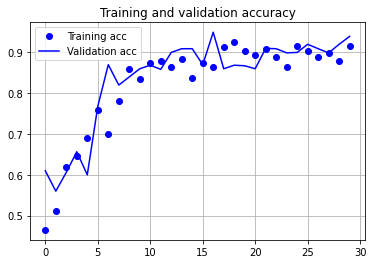

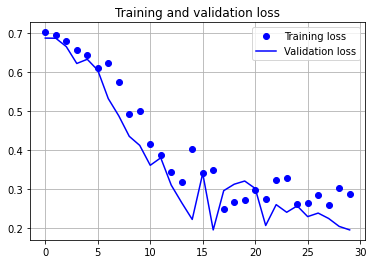

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid(axis='both')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(axis='both')
plt.legend()

plt.show()

# Test on test set

In [ ]:
import keras
from keras.models import load_model

test_model = load_model('plants_Inception_try.h5')


In [ ]:
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/kinetics/test/{classname}/*.mp4'

# Create video frame generator
test = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    shuffle=False,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    use_frame_cache=True)

Total data: 2 classes for 92 files for train


In [ ]:
test_model.evaluate(test)

9/9 [==============================] - 75s 9s/step - loss: 0.2834 - accuracy: 0.9222


[0.28343328833580017, 0.9222221970558167]